In [46]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [47]:
dataset = load_boston()

x = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(x.shape[0]))

Total samples in our dataset is: 506


In [48]:
def compute_cost(x, y, params):
    n_samples = len(y)
    h = x @ params
    # the h is hypothesis function which is just a candidate function for our mapping from inputs (X) to outputs (y)
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [49]:
def gradient_descent(x,  y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters, 1))
    # Here, n_iters denotes the number of iterations for the gradient descent
    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * x.T @ (x @ params - y)
        
        # As for the update rule, 1/n_samples) * X.T @ (X @ params - y) corresponds to the partial derivative of the cost function with respect to the parameters. So, params holds the updated parameter values according to the update rule.
        
        J_history[i] = compute_cost(x, y, params)
        # We want to keep the history of our costs returned by the cost function in each iteration so we use a NumPy array J_history for that.

    return (J_history, params)

In [50]:
n_samples = len(y)

mu = np.mean(x, 0)
sigma = np.std(x, 0)

x = (x-mu) / sigma

x = np.hstack((np.ones((n_samples,1)),x))
n_features = np.size(x,1)
params = np.zeros((n_features,1))

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost is:  [11.00713381]


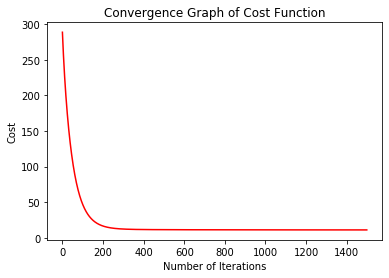

In [59]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(x, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(x, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()